In [1]:
import pandas as pd
data=pd.read_csv("zoo.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
import numpy as np
labels=data['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


"%1)matplotlib inline is a magic command in Jupyter Notebook and Google Colab that allows for the inline rendering of plots.\n2)fig, ax = plot.subplots() creates a new figure and a set of subplots, with fig being the figure object and ax being the subplot object.\n3)labels.value_counts() calculates the value counts of the pandas series labels. This function returns a new pandas series where the index is the unique values in labels and the values are the corresponding frequencies.\n4).plot(ax=ax, kind='bar') is a pandas method that generates a bar plot of the value counts series. ax=ax specifies that the plot should be generated on the ax subplot, and kind='bar' specifies that a bar plot should be created. The resulting plot will display the frequency of each unique value in the labels series."

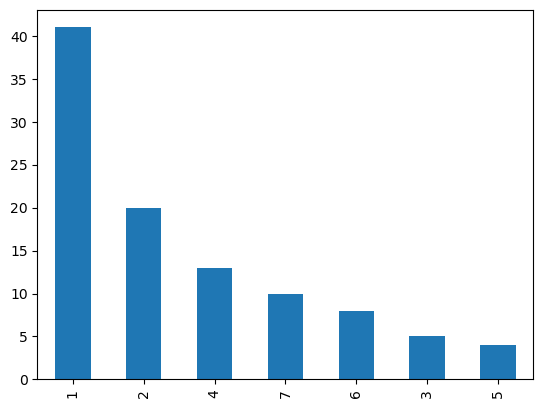

In [11]:
from matplotlib import pyplot as plot
%matplotlib inline
fig,ax = plot.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')
'''%1)matplotlib inline is a magic command in Jupyter Notebook and Google Colab that allows for the inline rendering of plots.
2)fig, ax = plot.subplots() creates a new figure and a set of subplots, with fig being the figure object and ax being the subplot object.
3)labels.value_counts() calculates the value counts of the pandas series labels. This function returns a new pandas series where the index is the unique values in labels and the values are the corresponding frequencies.
4).plot(ax=ax, kind='bar') is a pandas method that generates a bar plot of the value counts series. ax=ax specifies that the plot should be generated on the ax subplot, and kind='bar' specifies that a bar plot should be created. The resulting plot will display the frequency of each unique value in the labels series.'''

In [12]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
features=data.values[:,1:-1]
features.shape

(101, 16)

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
model = AgglomerativeClustering(n_clusters=7,linkage="average",affinity="cosine")

In [38]:
cluster=model.fit(features)

In [39]:
model.labels_


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [23]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [25]:
labels = labels-1

In [27]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(labels,model.labels_)

In [28]:
abs_error = np.sqrt(score)
print(abs_error)

2.0416456185350014
